In [1]:
%matplotlib widget

# Datation des surfaces planétaires par distribution en fréquence de taille des cratères d'impact

Les surfaces des planètes et lunes telluriques sont recouvertes de cratères d'impact.
Les cratères sont formés par le flux constant d'astéroïdes qui heurtent la surface de la Terre.
Le principe de base est très simple : plus on observe de cratères sur une surface géologique, plus cette dernière est vieille.
Ce notebook a trois objectifs :
- comprendre comment les surfaces planétaires sont datées
- avoir un exemple d'utilisation d'un modèle et comment l'exploiter au mieux
- découvrir le concept de notebook et présenter du code python de façon interactive


## Observations

### Introduction

![alt text](Figures/moon_surfaces.png "Deux surfaces lunaires d'âges différents")

Comme illustré par ces deux images, le nombre de cratères sur une surface géologique dépend principalement de son âge.
On ne peut cependant pas simplement comparer le nombre de cratères sur deux surfaces. En effet, un second phénomène entre en jeu : plus les cratères sont petits, plus ils sont nombreux. Il faut donc absolument prendre en compte le diamètre des cratères.
La première étape consiste donc à réaliser une cartographie des cratères sur un logiciel de SIG. On peut alors facilement calculer le diamètre de chaque cratère et exporter un fichier exploitable dans le logiciel de votre choix (ici python). Les informations indispensables pour la suite de l'analyse sont :
- une liste des diamètres de tous les cratères de la zone
- la surface sur laquelle a été réalisée la cartographie

### Import des données

Commençons donc par importer ces données :

In [2]:
# Ce code importe toutes les extensions python dont nous allons nous servir
import ipywidgets as widgets
from IPython.display import display
from osgeo import ogr
from matplotlib import pyplot as plt
import numpy as np
from decimal import Decimal

style = {'description_width': 'initial'}
layout = widgets.Layout(width='auto', height='60px')

In [3]:
# Rentrez ici les chemins vers vos fichiers de cartographie
cheminShapefileCratere = 'Data/CRATER_Hercules.shp'
nomDiamInput ='diam_km'

cheminShapefileAire= 'Data/AREA_Hercules.shp'
nomAireInput = 'area_km2'

In [4]:
# Ce morceau de code ouvre les fichiers et importe les données sous la forme d'un vecteur

driver = ogr.GetDriverByName('ESRI Shapefile')

# Ouverture du shapefile de cartographie et récupération des diamètres dans un vecteur
cratFilePath = cheminShapefileCratere
diamField = nomDiamInput
craterShp = ogr.Open(cratFilePath, 0)
cratLayer = craterShp.GetLayer()
featureCount = cratLayer.GetFeatureCount()

# On itère sur tous les cratères et on récupère le diamètre
diamCrat = np.zeros(featureCount)
for index in range(0, featureCount):
    crater = cratLayer.GetFeature(index)
    diamCrat[index] = crater.GetField(diamField)
craterShp = None


# Ouverture du shapefile de l'aire cartographiée et récupération de l'aire
aireFilePath = cheminShapefileAire
aireField = nomAireInput
aireShp = ogr.Open(aireFilePath, 0)
aireLayer = aireShp.GetLayer()
aireFeat = aireLayer.GetFeature(0)

aire = aireFeat.GetField(aireField)
aireShp = None

print("{} cratères sur une surface de {:.0f} km². Soit une densité de {:.2E} cratères/km²".format(
    diamCrat.size, aire, Decimal(diamCrat.size/aire)
))
print("Liste des diamètres (en km) :")

print(diamCrat)

80 cratères sur une surface de 41287 km². Soit une densité de 1.94E-3 cratères/km²
Liste des diamètres (en km) :
[ 4.28601  7.50853  9.40109  2.22648  2.17502  1.49464  2.3434   3.48797
  1.57569  2.13829  2.6093   2.05368  1.72943  3.24642  2.35959  1.77693
  1.6205   2.6826   3.98696  2.40331  3.02525  2.88067  3.00933  2.85528
  3.54441  1.38317  2.64902  3.16086  2.39121  1.76435  1.7534   3.34037
  1.59587  1.15199  1.35121  1.18435  1.85654  7.32694  1.73757  1.2249
  2.78694  2.26757  1.74007  2.83445  1.80193  3.69861  4.84012  2.10441
  2.10329  1.21098  1.53157  2.21051  2.41321  3.3413   2.82489  1.82463
  1.20156  2.53457  1.53026  2.77301  1.08916  1.682    1.57881  1.49872
  1.29161  2.4208   2.10754  1.51224  1.86603  2.19193  3.63221  4.15193
  1.58029  1.7893   1.24506 10.39671  2.2592   2.19285  3.24564  2.1287 ]


ERROR 1: PROJ: proj_identify: Open of /home/user/anaconda3/envs/CraterMorphologyTools/share/proj failed
ERROR 1: PROJ: proj_identify: Open of /home/user/anaconda3/envs/CraterMorphologyTools/share/proj failed


### Représentation graphique

On a donc désormais la liste des diamètres sous forme d'un vecteur. Cependant, cette liste n'est pas facile à analyser. Nous allons représenter nos données sous forme graphique. Dans notre cas, la meilleure façon de représenter nos données est sous forme d'un histogramme. C'est-à-dire que nous allons compter le nombre de cratères dans une gamme de diamètres (= classe de diamètres). La bibliothèque matplotlib de python contient des fonctions capables de réaliser un histogramme à partir d'un vecteur de données.

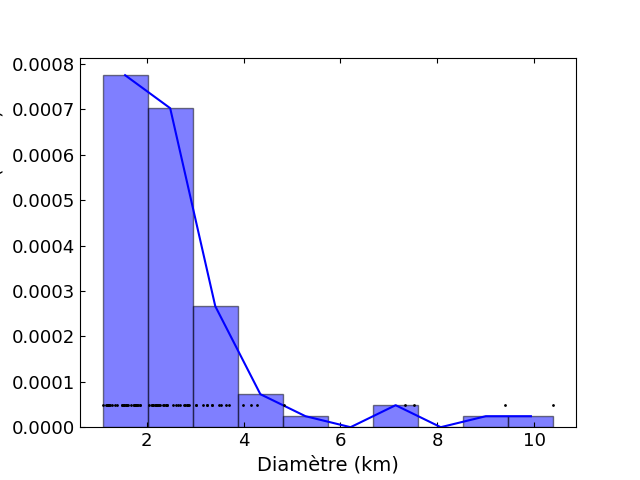

In [5]:
# Ces lignes créent la figure et nomment les axes
figure =  plt.figure()
sousFigure = figure.add_subplot(111)
sousFigure.set_ylabel(r'Densité de cratères (km$^{-2}$)', fontsize=14)
sousFigure.set_xlabel(r'Diamètre (km)', fontsize=14)
sousFigure.tick_params(direction='in', top=True, which='both', labelsize=13)

# Cette ligne permet de créer un histogramme des données grace à la bibliothèque python numpy
nombreCrateres, classesDiam = np.histogram(diamCrat)
densiteCrateres = nombreCrateres/aire

# Cette ligne réalise la figure de l'histogramme
sousFigure.bar(
    classesDiam[:-1], densiteCrateres, width=np.diff(classesDiam),
    color = "blue", alpha = 0.5, align="edge",
    linewidth = 1, edgecolor = 'k'
)
# On ajoute un graphique en ligne
sousFigure.plot((classesDiam[:-1]+classesDiam[1:])/2, densiteCrateres, 'b')
# Cette ligne permet de représenter un point pour chaque cratère
sousFigure.plot(diamCrat, np.full(np.size(diamCrat), np.min(densiteCrateres[np.nonzero(densiteCrateres)]) * 2), 'ko', markersize = 1)

Voici donc notre première distribution en taille des cratères. Cette représentation peut cependant être améliorée. Pour commencer, on constate que le nombre de cratères augmente exponentiellement pour les petits diamètres. Par convention, on utilise une double échelle logarithmique. Attention, il faut aussi utiliser des classes de diamètre logarithmique. Cette fois-ci, Python ne propose pas une solution simple et il faut créer les classes nous-mêmes. Allez, on recommence :

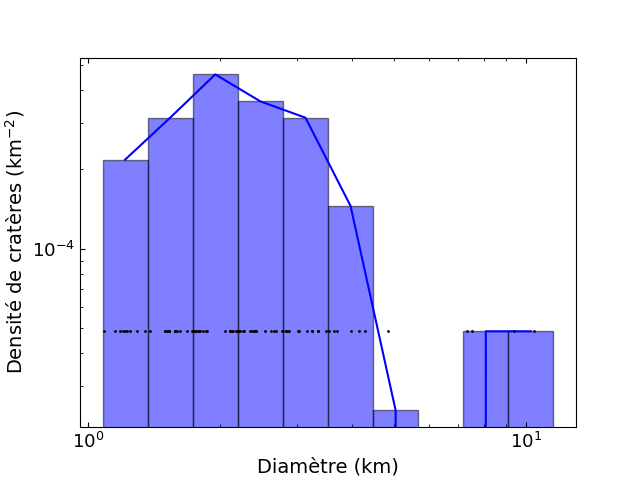

In [6]:
# On commence par créer les classes de diamètres
# On définit une fonction car nous allons réutiliser ce bout de code
# Cette fonction permet de créer un vecteur stockant les limites des classes de diamètre
def creationClasseLogarithmiques(nbClasses, diammin, diamMax):
    # La bibliothèque numpy permet de faire des opérations sur les vecteurs
    tailleClasseDiamLog = (np.log10(diamMax) - np.log10(diammin)) / nbClasses
    return 10 ** (np.log10(diammin) + np.arange(0, nbClasses + 1) * tailleClasseDiamLog)

# Maintenant, utilisons notre fonction
nbClasses = 10
diamMin = np.min(diamCrat)
diamMax = np.max(diamCrat)
classesDiam =  creationClasseLogarithmiques(nbClasses, diamMin * 0.99, diamMax * 1.11)


# Cette fonction permet de passer des limites des classes aux coordonnées du centre de la classe
def conversionClasseVersVecteur(classeDiametre):
    return np.sqrt(classeDiametre[:-1]*classeDiametre[1:])


# Ces lignes créent la figure et nomment les axes
figure =  plt.figure()
sousFigure = figure.add_subplot(111)
sousFigure.set_ylabel(r'Densité de cratères (km$^{-2}$)', fontsize=14)
sousFigure.set_xlabel(r'Diamètre (km)', fontsize=14)
sousFigure.set_xscale('log')
sousFigure.set_yscale('log')
sousFigure.tick_params(direction='in', top=True, which='both', labelsize=13)

# Cette fois-ci, on ajoute en paramètre les classes de diamètre que l'on vient de créer
nombreCrateres, classesDiam = np.histogram(diamCrat, bins=classesDiam)
densiteCrateres = nombreCrateres/aire

sousFigure.bar(
    classesDiam[:-1], densiteCrateres, width=np.diff(classesDiam),
    color = "blue", alpha = 0.5, align="edge",
    linewidth = 1, edgecolor = 'k'
)
sousFigure.plot(conversionClasseVersVecteur(classesDiam), densiteCrateres, 'b')
sousFigure.plot(diamCrat, np.full(np.size(diamCrat), np.min(densiteCrateres[np.nonzero(densiteCrateres)]) * 2), 'ko', markersize = 1)

Voici une représentation légèrement améliorée, mais que se passe-t-il si l'on change le nombre de classes utilisées ? Essayez de modifier le code ci-dessous en changeant le nombre de classes utilisées. Quels sont les problèmes rencontrés lorsqu'on change le nombre de classes ? Quelles solutions proposer à ces problèmes ?

interactive(children=(IntSlider(value=5, description='nombreClassesUpdate', min=1), Output()), _dom_classes=('…

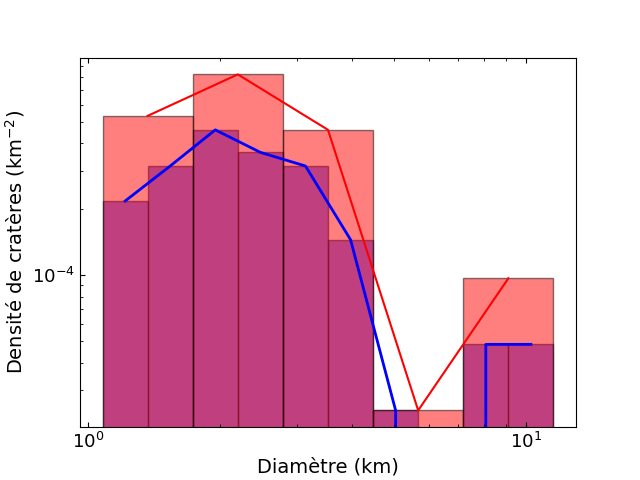

In [7]:
# Ce code permet de visualiser deux densités de cratère avec un nombre de classes différent

changingNumberClass = widgets.IntSlider(5, 1, 100)
vosClasses = creationClasseLogarithmiques(changingNumberClass.value, diamMin * 0.99, diamMax * 1.11)

# On refait la même figure
figure =  plt.figure()
sousFigure = figure.add_subplot(111)
sousFigure.set_ylabel(r'Densité de cratères (km$^{-2}$)', fontsize=14)
sousFigure.set_xlabel(r'Diamètre (km)', fontsize=14)
sousFigure.set_xscale('log')
sousFigure.set_yscale('log')
sousFigure.tick_params(direction='in', top=True, which='both', labelsize=13)

nombreCrateres, classesDiam = np.histogram(diamCrat, bins=classesDiam)
densiteCrateres = nombreCrateres/aire
sousFigure.bar(
    classesDiam[:-1], densiteCrateres, width=np.diff(classesDiam),
    color = "blue", alpha = 0.5, align="edge",
    linewidth = 1, edgecolor = 'k',
    label = '{} classes'.format(nbClasses)
)
sousFigure.plot(conversionClasseVersVecteur(classesDiam), densiteCrateres, 'b', linewidth = 2)

# On ajoute le nouvel histogramme en rouge
nombreCrateres2, vosClasses = np.histogram(diamCrat, bins=vosClasses)
densiteCrateres2 = nombreCrateres2/aire

bars = sousFigure.bar(
    classesDiam[:-1], densiteCrateres, width=np.diff(classesDiam),
    color = "blue", alpha = 0.5, align="edge",
    linewidth = 1, edgecolor = 'k',
    label = '{} classes'.format(nbClasses)
)
ligne, = sousFigure.plot(conversionClasseVersVecteur(vosClasses), densiteCrateres2, color = 'red')

# Afin de pouvoir intéragir avec le diagramme il faut modifier le code précédent
plottedRectangles = []
for rectangle in bars:
    plottedRectangles.append(sousFigure.add_patch(rectangle))
bars.remove()

# Cette fonction permet d'update la figure en fonction du nombre de bin choisi
def updateFigure(nombreClassesUpdate):
    # on calcule la nouvelle densité
    classesUpdate = creationClasseLogarithmiques(nombreClassesUpdate, diamMin * 0.99, diamMax * 1.11)
    nombreCrateresUpdate, classesUpdate = np.histogram(diamCrat, bins=classesUpdate)
    densiteCrateresUpdate = nombreCrateresUpdate/aire

    ligne.set_data(conversionClasseVersVecteur(classesUpdate), densiteCrateresUpdate)

    dummyBars = sousFigure.bar(
        classesUpdate[:-1], densiteCrateresUpdate, width=np.diff(classesUpdate),
        color = "red", alpha = 0.5, align="edge",
        linewidth = 1, edgecolor = 'k'
    )

    rectanglesToRemove = []
    maxSize = np.max([np.size(dummyBars.get_children()), np.size(plottedRectangles)])
    for i in np.arange(0,maxSize):
        if (i < np.size(plottedRectangles) and i < np.size(dummyBars)):
            plottedRectangles[i].remove()
            plottedRectangles[i] = sousFigure.add_patch(dummyBars[i])
        elif (i < np.size(plottedRectangles) and i >= np.size(dummyBars)):
            plottedRectangles[i].remove()
            rectanglesToRemove.append(plottedRectangles[i])
        else:
            plottedRectangles.append(sousFigure.add_patch(dummyBars[i]))

    for rectangleToRemove in rectanglesToRemove:
        plottedRectangles.remove(rectangleToRemove)

    dummyBars.remove()

    figure.canvas.draw_idle()

interactiveHistogram = widgets.interactive(updateFigure, nombreClassesUpdate = changingNumberClass)

display(interactiveHistogram)

On peut constater plusieurs problèmes :
- 1 : pour un diamètre donné, le nombre de cratères dépend de la taille des classes.  La ligne rouge et la ligne bleue ne s'alignent pas.
- 2 : si le nombre de classes est trop grand, les classes peuvent ne contenir que 0 ou 1 cratère
- 3 : si le nombre de classes est trop faible, on perd l'information sur la distribution

Les problèmes 2 et 3 sont particulièrement difficiles à régler. Le choix du "bon" nombre de classes est particulièrement compliqué et relève de problèmes statistiques complexes.
Le problème 1 est facile à régler. En effet, on peut normaliser le nombre de cratères dans une classe, c'est-à-dire diviser le nombre de cratères par la taille de la classe. On obtient donc un nombre de cratères/km³. Cette représentation est appelée densité en fréquence de taille.

On peut refaire la figure précédente en appliquant cette opération pour observer que la densité ne dépend plus du nombre de classes.

In [8]:
# Ce code permet de visualiser deux densités en fréquence de cratère avec un nombre de classes différent
densiteNorm = densiteCrateres/np.diff(classesDiam)
densiteNorm2 = densiteCrateres2/np.diff(vosClasses)


# On refait la même figure
figure =  plt.figure(figsize = (7,5))
sousFigure = figure.add_subplot(111)
sousFigure.set_ylabel(r'Densité de cratères (km$^{-3}$)', fontsize=14)
sousFigure.set_xlabel(r'Diamètre (km)', fontsize=14)
sousFigure.set_xscale('log')
sousFigure.set_yscale('log')
sousFigure.tick_params(direction='in', top=True, which='both', labelsize=13)


sousFigure.bar(
    classesDiam[:-1], densiteNorm, width=np.diff(classesDiam),
    color = "blue", alpha=0.5, align="edge",
    linewidth = 1, edgecolor = 'k',
    label = '{} classes'.format(nbClasses)
)
sousFigure.plot(conversionClasseVersVecteur(classesDiam), densiteNorm, 'b', linewidth = 2)


bars = sousFigure.bar(
    vosClasses[:-1], densiteNorm2, width=np.diff(vosClasses),
    color = "blue", alpha = 0.5, align="edge",
    linewidth = 1, edgecolor = 'k',
    label = '{} classes'.format(nbClasses)
)
ligne, = sousFigure.plot(conversionClasseVersVecteur(vosClasses), densiteNorm2, color = 'red')

# Afin de pouvoir intéragir avec le diagramme il faut modifier le code précédent
plottedRectangles = []
for rectangle in bars:
    plottedRectangles.append(sousFigure.add_patch(rectangle))
bars.remove()
    
# Cette fonction permet d'update la figure en fonction du nombre de bin choisi
def updateFigure(nombreClassesUpdate):
    # on calcule la nouvelle densité
    classesUpdate = creationClasseLogarithmiques(nombreClassesUpdate, diamMin * 0.99, diamMax * 1.11)
    nombreCrateresUpdate, classesUpdate = np.histogram(diamCrat, bins=classesUpdate)
    densiteCrateresUpdate = nombreCrateresUpdate/aire/np.diff(classesUpdate)
    
    ligne.set_data(conversionClasseVersVecteur(classesUpdate), densiteCrateresUpdate)

    dummyBars = sousFigure.bar(
        classesUpdate[:-1], densiteCrateresUpdate, width=np.diff(classesUpdate),
        color = "red", alpha = 0.5, align="edge",
        linewidth = 1, edgecolor = 'k'
    )

    rectanglesToRemove = []
    maxSize = np.max([np.size(dummyBars.get_children()), np.size(plottedRectangles)])
    for i in np.arange(0,maxSize):
        if (i < np.size(plottedRectangles) and i < np.size(dummyBars)):
            plottedRectangles[i].remove()
            plottedRectangles[i] = sousFigure.add_patch(dummyBars[i])
        elif (i < np.size(plottedRectangles) and i >= np.size(dummyBars)):
            plottedRectangles[i].remove()
            rectanglesToRemove.append(plottedRectangles[i])
        else:
            plottedRectangles.append(sousFigure.add_patch(dummyBars[i]))

    for rectangleToRemove in rectanglesToRemove:
        plottedRectangles.remove(rectangleToRemove)

    dummyBars.remove()

    figure.canvas.draw_idle()

interactiveHistogram = widgets.interactive(updateFigure, nombreClassesUpdate = changingNumberClass)

display(interactiveHistogram)

sousFigure.plot(diamCrat, np.full(np.size(diamCrat), np.min(densiteCrateres[np.nonzero(densiteCrateres)]) * 2), 'ko', markersize = 1)

interactive(children=(IntSlider(value=5, description='nombreClassesUpdate', min=1), Output()), _dom_classes=('…

### Pour aller plus loin

On constate dans cette dernière figure que la densité de cratère normalisée ne varie plus en fonction du nombre de classes utilisé.

Les problèmes soulevés dans le cas d'un nombre de classes trop petit ou trop grand persistent. Afin de contourner ce problème, on peut faire appel à des techniques statistiques plus compliquées : l'estimation par noyau qui permet d'obtenir une représentation continue de la densité de cratères.

In [9]:
# Ce morceau de code calcule une distribution en fréquence de taille grâce à une méthode d'estimation par noyau
def fast_proba(Diam, Diam_bin, D_err_f=0.1):
    proba = np.zeros(len(Diam_bin) - 1)
    # iterate through craters
    for i_crat in range(0, len(Diam)):
        D_err = D_err_f * Diam[i_crat]
        # compute an array with the distance to the crat in diam
        Diam_proba = 1 / (D_err * np.sqrt(2 * np.pi)) * np.exp(-1 / 2 * ((Diam[i_crat] - Diam_bin) / D_err) ** 2)
        Diam_proba_int = (Diam_proba[1:] + Diam_proba[:-1]) / 2 * (Diam_bin[1:] - Diam_bin[:-1])
        proba = proba + Diam_proba_int
    return proba


vecteurEstimationNoyau = creationClasseLogarithmiques(2000, diamMin * 0.68, diamMax * 1.32)
CSFD = fast_proba(diamCrat, vecteurEstimationNoyau, D_err_f=0.1) / aire / np.diff(vecteurEstimationNoyau)

def initalisationFigureDensite():
    figure =  plt.figure()
    sousFigure = figure.add_axes([0.12, 0.12, 0.76, 0.76])
    sousFigure.set_ylabel(r'Densité de cratères (km$^{-3}$)', fontsize=14)
    sousFigure.set_xlabel(r'Diamètre (km)', fontsize=14)
    sousFigure.set_xscale('log')
    sousFigure.set_yscale('log')
    sousFigure.tick_params(direction='in', top=True, which='both', labelsize=13)
    return figure, sousFigure

def figureDensite(sousFigure, classeDiam, densiteCrateres, color = 'blue'):
    densite, = sousFigure.plot(conversionClasseVersVecteur(classeDiam), densiteCrateres, color = color)

    return densite

def figureCrateres(
        sousFigure,
        vecteurDiam,
        densiteCrateres,
        diamCrat,
        aire,
        color = 'blue'
):
    densiteCrateres = figureDensite(sousFigure, vecteurDiam, densiteCrateres, color)
    pointsCrateres, = sousFigure.plot(
        diamCrat, np.full(np.size(diamCrat), np.nanmin(CSFD)),
        'o', markersize = 1,
        alpha = 0.5,
        color = color,
    )
    annotationCrateres = sousFigure.annotate(
        "{} cratères sur\nune surface de {:.0f} km²".format(diamCrat.size, aire),
        xy = (0.2, 0.25),
        xycoords='subfigure fraction',
        horizontalalignment='left',
        fontsize = 12,
        color = color
    )
    return densiteCrateres, pointsCrateres, annotationCrateres

figure, sousFigure = initalisationFigureDensite()
figureCrateres(sousFigure, vecteurEstimationNoyau, CSFD, diamCrat, aire)

(<matplotlib.lines.Line2D at 0x7f2c74469160>,
 Text(0.2, 0.25, '80 cratères sur\nune surface de 41287 km²'))

### Quelques remarques sur les données

Cette représentation permet d'obtenir une représentation continue de la densité de cratères en fonction du diamètre. On notera cependant quelques artefacts :
- lorsque les cratères sont peu nombreux (grands diamètres), chaque cratère crée une "bosse" dans la distribution.
- pour les petits cratères, on observe une diminution (ici pour les cratères de moins de 2 km). Cet artefact trouve deux explications : une difficulté à cartographier les petits cratères ainsi qu'un effet de bord de l'estimation par noyau.

### Conclusion

Nous venons de représenter une distribution en fréquence de taille de cratères. Cette distribution est caractéristique d'une surface planétaire. Elle dépend principalement de :
- l'âge de la surface : plus la surface est vieille, plus la densité de cratères est importante
- le corps planétaire considéré

À partir de ces données, on peut modéliser la population de cratères sur une planète donnée d'un âge donné.

## Modélisation

L'observation des densités de cratères en fonction de leur taille dans de nombreuses conditions différentes (population d'astéroïdes, cratères lunaires, cratères martiens...) permet d'exprimer la relation entre densité de cratères et diamètre grâce à une loi empirique.

La formule suivante, appelée fonction de production, décrit la relation entre densité de cratères et diamètre :

$$
\log(Freq_{crat}({age},{Diam}))= \log(a_0( {age} ) + \sum_{i=1}^{n}\left(a_i \times \log({Diam})^i\right)
$$

Dans cette équation, les coefficients $a_i$ ont été déterminés empiriquement (il y en a 12 au total).

Les datations absolues des roches lunaires rapportées par les missions Apollo ont permis, pour une dizaine de surfaces géologiques, d'associer un âge à une densité de cratères. La figure suivante décrit le nombre de cratères de plus de 1 km de diamètre en fonction de l'âge de la surface. Les surfaces datées sont représentées par les points.

![alt text](Figures/calibrationchrono.jpg "Nombre de cratères de plus de 1 km de diamètre en fonction de l'âge de la surface.")

Les chercheurs ont alors pu ajouter dans l'équation l'âge de la surface décrit par l'équation suivante (courbe noire dans la figure précédente) :

$$
Freq_{crat}=\frac{N_{crat}}{area*\delta Diam}$
$$

On peut donc modéliser la distribution en fréquence de taille d'une surface donnée. Le code suivant vous permet de choisir les paramètres de votre modélisation et de visualiser le résultat.


In [10]:
# Ce code créé l'interface de séléction de l'âge et de la gamme de diamètre

def createModelWidgets():
    # Choix de l'âge
    ageSlider = widgets.FloatSlider(value = 3, min = 0.1, max = 5, step = 0.1, description = r'Age (Ga) :')
    diamMinInput = widgets.BoundedFloatText(
        value=0.5,
        min=0.1,
        max=9.0,
        description='Diamètre minimal (km) :',
        disabled=False,
        style =style
    )
    diamMaxInput = widgets.BoundedFloatText(
        value=50,
        min=10,
        max=500,
        description='Diamètre maximal (km) :',
        disabled=False,
        style =style
    )
    
    return ageSlider, diamMinInput, diamMaxInput
    

In [11]:
# Ce morceau de code définit une fonction qui permet de calculer la densité de cratère en fonction du diamètre pour un âge donné
# Coefficients du modèle pour la Lune
# Neukum (2001)
coefFoncProdLune = [-3.0768, -3.557528, 0.781027, 1.021521,
           -0.156012, -0.444058, 0.019977, 0.086850,
           -0.005874, -0.006809, 8.25 * 10 ** (-4), 5.54 * 10 ** (-5)]
# Neukum (2001)
coefChronoLune = [5.44 * 10 ** (-14), 6.93, 0, 8.38 * 10 ** (-4)]

# Cette partie du code créé une fonction permettant de calculer une isochrone (=densité modèle pour un âge donné)
def modeleIsochrone(vecteurDiam, age, coefChrono, coefFoncProd):    
    facteurAge = (coefChrono[0] * (np.exp(coefChrono[1] * age) - 1)
              + coefChrono[3] * age)

    isochroneCumu = vecteurDiam * np.nan
    for i_Diam in range(0, np.size(isochroneCumu)):
        isochroneCumu[i_Diam] = facteurAge * 10 ** np.sum(
            coefFoncProd[1:] * np.log10(vecteurDiam[i_Diam]) ** np.arange(1, len(coefFoncProd)))

    isochrone = -np.diff(isochroneCumu)/np.diff(vecteurDiam)

    return isochrone

In [12]:
# Fonction ajoutant un modèle à une figure
def figureModele(
        sousFigure,
        vecteurDiam,
        isochrone,
        age,
        color = 'blue'
):
    densiteModele = figureDensite(sousFigure, vecteurDiam, isochrone, 'green')
    sousFigure.set_xlim(vecteurDiam[0]/3, vecteurDiam[-1]*3)
    sousFigure.set_ylim(np.min(isochrone)/3, np.max(isochrone)*3)
    
    # On ajoute une annotation indiquant l'âge
    i_annotation = int(np.size(vecteurDiam)/10)
    angleData = np.rad2deg(np.arctan2(
        np.diff(isochrone)[i_annotation],
        np.diff(vecteurDiamModele)[i_annotation]
    ))
    angleTexte = sousFigure.transData.transform_angles(
        np.array((angleData,)),
        np.array([vecteurDiamModele[i_annotation], isochrone[i_annotation]]).reshape((1, 2))
    )[0]
    annotationAge = sousFigure.annotate(
            "{:.1f} Ga".format(age),
            xy = (vecteurDiamModele[i_annotation], isochrone[i_annotation]),
            xycoords='data',
            xytext=(2,2),
            textcoords="offset points",
            horizontalalignment='center',
            fontsize = 12,
            color = color,
            rotation = angleTexte,
            rotation_mode='anchor'
        )
    return densiteModele, annotationAge

interactive(children=(FloatSlider(value=3.0, description='Age (Ga) :', max=5.0, min=0.1), BoundedFloatText(val…

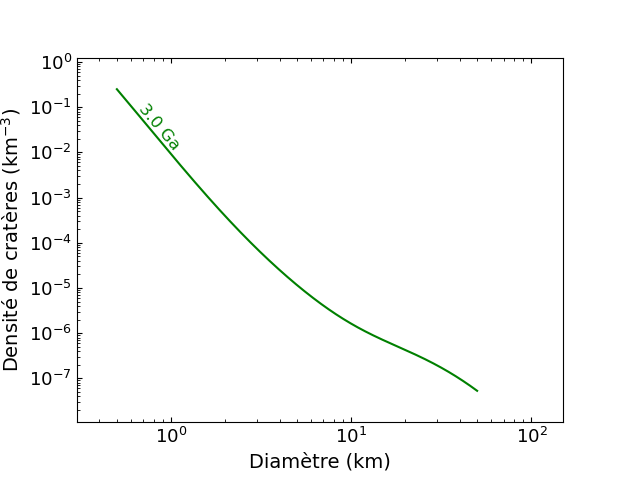

In [13]:
# Ce morceau de code permet de réaliser la figure de la distribution en fréquence de taille de cratère pour un âge donné (=isochrone)

ageSlider, diamMinInput, diamMaxInput = createModelWidgets()

# On construit un axe des ordonnées discret
vecteurDiamModele = creationClasseLogarithmiques(2000, diamMinInput.value, diamMaxInput.value)
isochrone = modeleIsochrone(vecteurDiamModele, ageSlider.value, coefChronoLune, coefFoncProdLune)

figure, sousFigure = initalisationFigureDensite()
densiteModele, annotationAge = figureModele(sousFigure, vecteurDiamModele, isochrone, ageSlider.value, 'green')
sousFigure.set_xlim(0.3, 150)
sousFigure.set_ylim(np.min(isochrone)/5, np.max(isochrone)*5)


def updateModelFigure(ageUpdate, diamMinUpdate, diamMaxUpdate):
    # On construit un axe des ordonnées discret
    vecteurDiamUpdate = creationClasseLogarithmiques(2000, diamMinUpdate, diamMaxUpdate)
    isochroneUpdate = modeleIsochrone(vecteurDiamUpdate, ageUpdate, coefChronoLune, coefFoncProdLune)
    
    # on update la courbe
    densiteModele.set_data(
        conversionClasseVersVecteur(vecteurDiamUpdate),
        isochroneUpdate
    )
    
    # On update aussi l'annotation
    i_annotation = int(np.size(vecteurDiamUpdate)/10)
    angleDataUpdate = np.rad2deg(np.arctan2(
    np.diff(isochroneUpdate)[i_annotation],
    np.diff(vecteurDiamUpdate)[i_annotation]
    ))
    angleTexteUpdate = sousFigure.transData.transform_angles(
        np.array((angleDataUpdate,)),
        np.array([vecteurDiamUpdate[i_annotation], isochroneUpdate[i_annotation]]).reshape((1, 2))
    )[0]
    annotationAge.set_text("{:.1f} Ga".format(ageUpdate))
    annotationAge.xy = ((vecteurDiamUpdate[i_annotation], isochroneUpdate[i_annotation]))
    annotationAge.set_rotation(angleTexteUpdate)
    
    figure.canvas.draw_idle()

figureInteractive = widgets.interactive(
    updateModelFigure,
    ageUpdate = ageSlider,
    diamMinUpdate = diamMinInput,
    diamMaxUpdate = diamMaxInput
)

display(figureInteractive)

Essayons de représenter nos données sur la même figure. En jouant avec la modélisation, quel âge donneriez-vous à la surface étudiée ?

interactive(children=(FloatSlider(value=3.0, description='Age (Ga) :', max=5.0, min=0.1), BoundedFloatText(val…

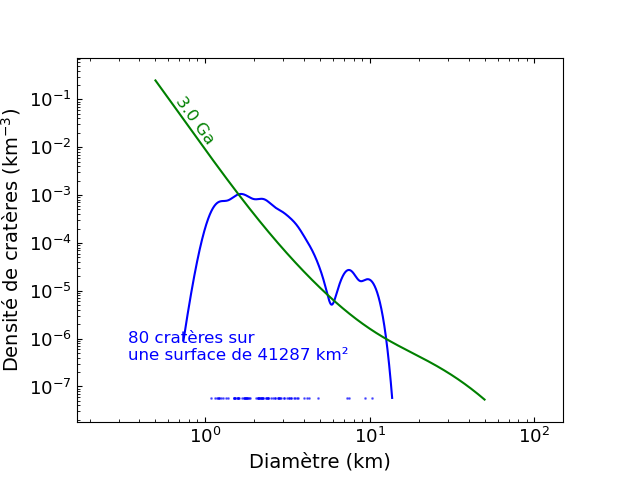

In [14]:
# Permet de visualiser en parallèle les données et le modèle 

figure, sousFigure = initalisationFigureDensite()
figureCrateres(sousFigure, vecteurEstimationNoyau, CSFD, diamCrat, aire, 'blue')

ageSlider, diamMinInput, diamMaxInput = createModelWidgets()

# On construit un axe des ordonnées discret
vecteurDiamModele = creationClasseLogarithmiques(2000, diamMinInput.value, diamMaxInput.value)
isochrone = modeleIsochrone(vecteurDiamModele, ageSlider.value, coefChronoLune, coefFoncProdLune)

densiteModele, annotationAge = figureModele(sousFigure, vecteurDiamModele, isochrone, ageSlider.value, 'green')

def updateModelFigure(ageUpdate, diamMinUpdate, diamMaxUpdate):
    # On construit un axe des ordonnées discret
    vecteurDiamUpdate = creationClasseLogarithmiques(2000, diamMinUpdate, diamMaxUpdate)
    isochroneUpdate = modeleIsochrone(vecteurDiamUpdate, ageUpdate, coefChronoLune, coefFoncProdLune)
    
    # on update la courbe
    densiteModele.set_data(
        conversionClasseVersVecteur(vecteurDiamUpdate),
        isochroneUpdate
    )
    
    # On update aussi l'annotation
    i_annotation = int(np.size(vecteurDiamUpdate)/10)
    angleDataUpdate = np.rad2deg(np.arctan2(
    np.diff(isochroneUpdate)[i_annotation],
    np.diff(vecteurDiamUpdate)[i_annotation]
    ))
    angleTexteUpdate = sousFigure.transData.transform_angles(
        np.array((angleDataUpdate,)),
        np.array([vecteurDiamUpdate[i_annotation], isochroneUpdate[i_annotation]]).reshape((1, 2))
    )[0]
    annotationAge.set_text("{:.1f} Ga".format(ageUpdate))
    annotationAge.xy = ((vecteurDiamUpdate[i_annotation], isochroneUpdate[i_annotation]))
    annotationAge.set_rotation(angleTexteUpdate)
    
    figure.canvas.draw_idle()
    
figureInteractive = widgets.interactive(
    updateModelFigure,
    ageUpdate = ageSlider,
    diamMinUpdate = diamMinInput,
    diamMaxUpdate = diamMaxInput
)

display(figureInteractive)

Pour trouver l'âge de la surface, vous avez essayé d'aligner la densité modélisée sur la densité observée. Cependant, vous avez probablement chacun proposé un âge légèrement différent. Nous allons donc terminer cet exercice en formalisant ce travail d'ajustement.

## Méthodes inverses

Le travail consistant à déterminer le modèle qui colle le plus aux données relève d'un domaine appelées méthodes inverses.

![alt text](Figures/Inverse_method.png "Schéma illustrant le principe des méthodes inverses")

Ce schéma illustre le principe des méthodes inverses :
- *Observations* : nos observations, ici la densité de cratère sur une surface donnée.
- *Studied parameters* : les paramètres qui nous intéressent, ici l'âge d'une surface.
- *Direct problem* : le problème direct ou modélisation, pour nous cela correspond au calcul d'une densité de cratère pour un âge donné grace aux fonctions de production et fonction chronologique.
- *Modeled data* : les données modélisées, ici les isochrones que vous avez visualisées.
- *Inverse problem* : le problème inverse. S'il est facile de créer une densité de cratères à partir d'un âge donné, il est plus difficile de passer de la densité de cratère à l'âge.




### Approche des moindres carrés

Face à ces problèmes, la solution pour comparer les données et les modèles est le plus souvent la méthode des moindres carrés. En d'autres termes, on intègre le carré de la différence entre le modèle et les données. Pour notre programme, les données sont discrétisées, l'intégrale devient donc une somme.

$$
$\chi(âge)= \sum_{i}^{\nu_{fit}}\left(densité_{i, modèle}(âge)-densité_{i, observée}\right)²
$$

L'objectif est de minimiser $\chi$. L'âge pour lequel cette valeur est minimal est alors considéré comme la meilleure solution.

Le morceau de code suivant va vous permettre de calculer $\chi$ en fonction de l'âge.

In [15]:
# Cette fonction permet de calculer Xi pour un âge donné
def calculXi(vecteurDiam, donnes, age, diamMin, diamMax):
    isochrone = modeleIsochrone(vecteurDiam, age, coefChronoLune, coefFoncProdLune)
    
    # Toutes les données ne sont pas forcément adaptées pour faire l'ajustement.
    # En particulier pour les petits cratères, on ne veut pas réaliser l'ajustement sur les artefacts
    iDiamMin = np.min(np.where(vecteurDiam > diamMin))
    iDiamMax = np.max(np.where(vecteurDiam < diamMax))
    
    return np.sum((isochrone[iDiamMin:iDiamMax] - donnes[iDiamMin:iDiamMax])**2)

Recommençons donc maintenant l'exercice précédent, mais en affichant cette fois-ci Xi

interactive(children=(FloatSlider(value=3.0, description='Age (Ga) :', max=5.0, min=0.1), BoundedFloatText(val…

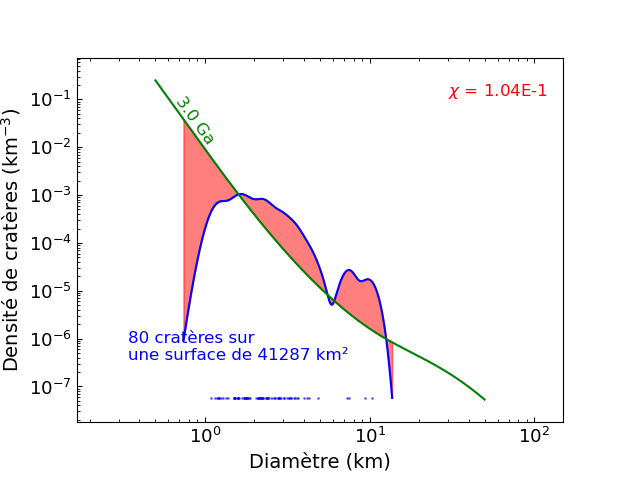

In [16]:
# Ce morceau de code affiche les données et le modèle, ainsi que le moindre carré et une représentation visuelle de l'erreur
figure, sousFigure = initalisationFigureDensite()
# On représente les données
figureCrateres(sousFigure, vecteurEstimationNoyau, CSFD, diamCrat, aire)

ageSlider, diamMinInput, diamMaxInput = createModelWidgets()
age = ageSlider.value
diamMin = diamMinInput.value
diamMax = diamMaxInput.value

# On représente le modèle
vecteurDiamModele = creationClasseLogarithmiques(2000, diamMin, diamMax)
isochrone = modeleIsochrone(vecteurDiamModele, age, coefChronoLune, coefFoncProdLune)
densiteModele, annotationAge = figureModele(sousFigure, vecteurDiamModele, isochrone, age, 'green')



# On représente l'erreur
xi = calculXi(vecteurEstimationNoyau, CSFD, age, diamMin, diamMax)
textXi = sousFigure.annotate(
    r"$\chi$ = {:.3E}".format(Decimal(xi)),
    xy = (0.7, 0.8),
    xycoords='subfigure fraction',
    horizontalalignment='left',
    fontsize = 12,
    color = 'red'
)
iDiamMin = np.min(np.where(vecteurEstimationNoyau > diamMin))
iDiamMax = np.max(np.where(vecteurEstimationNoyau < diamMax))
isochroneCompare = modeleIsochrone(vecteurEstimationNoyau[iDiamMin:iDiamMax+1], age, coefChronoLune, coefFoncProdLune)


fillPlot = sousFigure.fill_between(
    conversionClasseVersVecteur(vecteurEstimationNoyau[iDiamMin:iDiamMax+1]),
    isochroneCompare,
    CSFD[iDiamMin:iDiamMax],
    color = 'red',
    alpha = 0.5,
    zorder = 0
)



def updateFigureWithXi(ageUpdate, diamMinUpdate, diamMaxUpdate):
    vecteurDiamUpdate = creationClasseLogarithmiques(2000, diamMinUpdate, diamMaxUpdate)   
    isochroneUpdate = modeleIsochrone(vecteurDiamUpdate, ageUpdate, coefChronoLune, coefFoncProdLune)
    
    # on update la courbe
    densiteModele.set_data(
        conversionClasseVersVecteur(vecteurDiamUpdate),
        isochroneUpdate
    )
    
    # On update aussi l'annotation
    i_annotation = int(np.size(vecteurDiamUpdate)/10)
    angleDataUpdate = np.rad2deg(np.arctan2(
    np.diff(isochroneUpdate)[i_annotation],
    np.diff(vecteurDiamUpdate)[i_annotation]
    ))
    angleTexteUpdate = sousFigure.transData.transform_angles(
        np.array((angleDataUpdate,)),
        np.array([vecteurDiamUpdate[i_annotation], isochroneUpdate[i_annotation]]).reshape((1, 2))
    )[0]
    annotationAge.set_text("{:.1f} Ga".format(ageUpdate))
    annotationAge.xy = ((vecteurDiamUpdate[i_annotation], isochroneUpdate[i_annotation]))
    annotationAge.set_rotation(angleTexteUpdate)
        
    # On update maintenant le Xi
    xiUpdate = calculXi(
        vecteurEstimationNoyau, CSFD,
        ageUpdate, diamMinUpdate, diamMaxUpdate
    )
    textXi.set_text(r"$\chi$ = {:.2E}".format(Decimal(xiUpdate)))
    # update de l'erreur
    iDiamMinUpdate = np.min(np.where(vecteurEstimationNoyau > diamMinUpdate))
    iDiamMaxUpdate = np.max(np.where(vecteurEstimationNoyau < diamMaxUpdate))
    isochroneCompareUpdate = modeleIsochrone(vecteurEstimationNoyau[iDiamMinUpdate:iDiamMaxUpdate+1], ageUpdate, coefChronoLune, coefFoncProdLune)

    dummy = sousFigure.fill_between(
        vecteurEstimationNoyau[iDiamMinUpdate:iDiamMaxUpdate],
        isochroneCompareUpdate,
        CSFD[iDiamMinUpdate:iDiamMaxUpdate],
        alpha=0
    )
    dp = dummy.get_paths()[0]
    dummy.remove()
    #update the vertices of the PolyCollection
    fillPlot.set_paths([dp.vertices])
    
    figure.canvas.draw_idle()
    
figureInteractive = widgets.interactive(
    updateFigureWithXi,
    ageUpdate = ageSlider,
    diamMinUpdate = diamMinInput,
    diamMaxUpdate = diamMaxInput
)

display(figureInteractive)

$\chi$ est minimal pour un âge de 3.7 Ga


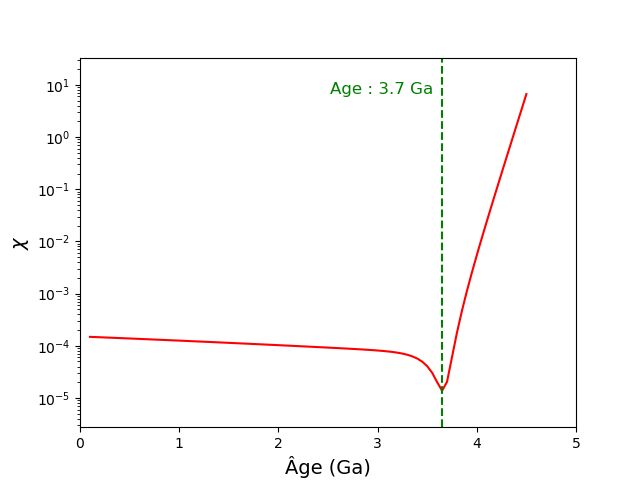

In [17]:
# Il faut tester différents âges et tester Xi pour tous ces ages
vecteurAge = np.arange(0.1, 4.55, 0.05)

diamMin = 2
diamMax = 30

# Boucle pour parcourir chaque âge et calculer Xi
xiAge = []
for age in vecteurAge:
    # Appeler la fonction calculXi avec l'âge actuel et les valeurs fixes de diamMin, diamMax et donnes
    xi = calculXi(vecteurEstimationNoyau, CSFD, age, diamMin, diamMax)
    xiAge.append(xi)

minimumXi = np.min(xiAge)
meilleurAge = vecteurAge[np.where(xiAge == minimumXi)][0]

print(r"$\chi$ est minimal pour un âge de {:.1f} Ga".format(meilleurAge))

figureXi = plt.figure()
sousFigureXi = figureXi.add_subplot(111)
sousFigureXi.set_yscale('log')
sousFigureXi.set_xlim((0, 5))
sousFigureXi.set_ylim((minimumXi/5, np.max(xiAge)*5))

sousFigureXi.set_ylabel(r'$\chi$', fontsize=14)
sousFigureXi.set_xlabel(r'Âge (Ga)', fontsize=14)

sousFigureXi.plot(vecteurAge, xiAge, color = 'red')
sousFigureXi.plot([meilleurAge, meilleurAge], [minimumXi/5, np.max(xiAge)*5], color = "green", linestyle = "dashed")
textAge = sousFigureXi.annotate(
    r"Age : {:.1f} Ga".format(meilleurAge),
    xy = (meilleurAge, np.max(xiAge)),
    xycoords='data',
    xytext=(-6,0),
    textcoords="offset points",
    horizontalalignment='right',
    fontsize = 12,
    color = 'green'
)

Nous avons donc trouvé le meilleur âge étant donné notre modèle. Attention à bien garder plusieurs limites en tête :
- C'est un âge modèle, c'est-à-dire que si le modèle est faux, alors notre âge est faux. Cela est particulièrement vrai lorsqu'on utilise cette méthode pour dater les surfaces martiennes. En effet, le flux d'impact est extrapolé depuis celui de la Lune, il est donc très mal contraint.
- Le choix de la gamme de cratère sur laquelle on réalise l'ajustement peut largement faire varier l'âge trouvé. Dans certain cas le choix du diamètre minimal peut être compliqué par des phénomènes d'oblitération des cratères qui fait disparaitre les plus petits cratères.

Pour finir réalisons une figure qui contient toutes les informations précédentes :

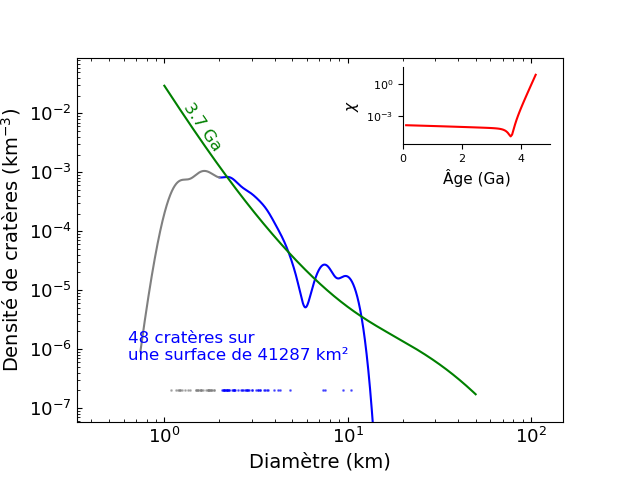

In [18]:
# Ce morceau de code affiche les données et le modèle, ainsi que le moindre carré et une représentation visuelle de l'erreur
figure, sousFigure = initalisationFigureDensite()

# On représente les données, mais avec un figuré différent pour les diamètres en dehors de la gamme choisie pour l'ajustement
cratGamme = diamCrat[np.where((diamMin < diamCrat) & (diamCrat < diamMax))]
iDiamMin = np.min(np.where(vecteurEstimationNoyau > diamMin))
iDiamMax = np.max(np.where(vecteurEstimationNoyau < diamMax))

densiteCraters, pointsCrateres, annotationCrateres = figureCrateres(
    sousFigure,
    vecteurEstimationNoyau[iDiamMin:iDiamMax+1],
    CSFD[iDiamMin:iDiamMax],
    cratGamme,
    aire
)
figureDensite(
    sousFigure,
    vecteurEstimationNoyau[:iDiamMin+1],
    CSFD[:iDiamMin],
    'grey'
)
figureDensite(
    sousFigure,
    vecteurEstimationNoyau[iDiamMax:],
    CSFD[iDiamMax:],
    'grey'
)

cratHorsGamme = diamCrat[np.where((diamMin > diamCrat) | (diamCrat > diamMax))]
sousFigure.plot(
        cratHorsGamme, np.full(np.size(cratHorsGamme), 2*10**-7),
        'o', markersize = 1,
        alpha = 0.5,
        color = 'grey',
    )
pointsCrateres.set_ydata(np.full(np.size(cratGamme), 2*10**-7))

# On représente le modèle
vecteurDiamModele = creationClasseLogarithmiques(2000, 1, 50)
isochrone = modeleIsochrone(vecteurDiamModele, meilleurAge, coefChronoLune, coefFoncProdLune)
densiteModele, annotationAge = figureModele(sousFigure, vecteurDiamModele, isochrone, meilleurAge, 'green')

# On rajoute un second graphe sur lequel on représente la variation de l'erreur en fonction de l'âge
sousFigureXi = figure.add_axes([0.63, 0.70, 0.23, 0.16])
sousFigureXi.set_yscale('log')
sousFigureXi.set_xlim((0, 5))
sousFigureXi.set_ylim((minimumXi/5, np.max(xiAge)*5))
sousFigureXi.set_xlabel(r'Âge (Ga)', fontsize=11)
sousFigureXi.set_ylabel(r'$\chi$', fontsize=11)

sousFigureXi.tick_params(direction='out', which='both', labelsize=8)
sousFigureXi.spines['top'].set_visible(False)
sousFigureXi.spines['right'].set_visible(False)

sousFigureXi.plot(vecteurAge, xiAge, color = 'red')

### Pour aller plus loin

La reduction de l'écart entre le modèle et les données relève de problèmes statistiques complexes. La méthode des moindres carrés est souvent utilisée. En effet, la formule de $\chi$ peut être démontrée en supposant que les données s'éloignent du modèle de façon gaussienne (ce qui est le cas dans de nombreux phénomènes naturels).

Dans le cas de la cratérisation, on peut cependant partir sur une hypothèse différente. Je vais présenter ici cette approche proposée par Michael, 2016 (Planetary surface dating from crater size-frequency distribution measurements: Poisson timing analysis).

La probabilité d'occurrence d'un nombre de cratères $N_{crat}$ entre diam$_i$ et diam$_{i+1}$ peut être décrit par une loi de Poisson :

$$
P(N_{crat},\lambda)=\frac{\lambda^{N_{crat}}}{N_{crat}!}\times e^{-\lambda}
$$

Avec $\lambda$ le taux moyen de cratérisation qui dépend de l'âge de la surface et du diamètre considéré.

On peut alors exprimer la probabilité d'observer un jeu de donnée de cratères $\mathbb{D}$ en sachant de l'âge de la surface.
En effet, c'est la probabilité d'observer un nombre de cratères $N_{crat, i}$ dans chacune des $n$ gammes de diamètres :

$$
P(\mathbb{D} \mid age) = P\left(\bigcap\limits_{i}(N_{crat, i},\lambda_i(age))\right) = \prod_{i} P(N_{crat, i},\lambda)
$$

Si l'on fait tendre le nombre de classes de diamètres vers l'infini, on a alors uniquement deux possibilités, soit il y a un cratère dans cette classe, soit il y en a 0. On peut donc réécrire l'équation précédente, avec la partie gauche étant la probabilité des classes avec 0 cratère et la partie droite les classes avec 1 cratère :

$$
P(\mathbb{D} \mid age) = \frac {\prod_{i} P(k=0,\lambda_i(age))} {\prod_{D_i \in \mathbb{D}} P(k=0,\lambda_i(age))}  \times\prod_{D_i \in \mathbb{D}} P(k=1,\lambda_i(age))
$$

En appliquant la formule de la loi de Poisson, on obtient une formule qui se simplifie en :

$$
P(\mathbb{D} \mid age) = \prod_{\nu_{fit}}e^{-\lambda_i(age)} \times \prod_{D_i \in \mathbb{D}}\lambda_i(age)
$$

On peut exprimer $\lambda_i(age)$ grace aux modèles présentés précédement : 

$$
\lambda_i(age) = Freq_{crat}({age},{Diam_i}) \times Aire\times\delta Diam$
$$

En remplaçant $Freq_{crat}({age},{Diam_i})$ par son expression, on peut remplacer une partie de l'expression de $P(\mathbb{D} \mid age)$ :

$$
\lim_{n \to \inf}\left(\prod_{\nu_{fit}}\exp(-\lambda_i(age)) \right) =\lim_{n \to \inf} \left( \exp\left(\sum_{\nu_{fit}}-\lambda_i(age)\right) \right)= \exp\left(\int -f(Diam, age)\times Aire\times\delta Diam \right)
$$

En notant $F_{crat}$ l'intégrale de la fonction $Freq_{crat}({age},{Diam_i})$ on peut écrire une version simplifiée :

$$
P(\mathbb{D} \mid age) = \exp\left(-Area\times[ \, F_c ] \,_{Diam_{min}}^{Diam_{max}}\right)\times \prod_{Diam_i \in \mathbb{D}}\lambda_i(age)
$$


On termine en utilisant le théorème de Bayes selon lequel :

$$
P(age\mid \mathbb{D}) = \frac{P(\mathbb{D} \mid age) \times P(age)}{P(\mathbb{D})}
$$

Dans cette formule, $P(âge)$ est une probabilité constante car l'on n'a aucune connaissance à-priori de l'âge et $P(\mathbb{D})$ permet de normaliser la probabilité.

On peut donc calculer cette probabilité pour chaque age et choisir l'âge le plus probable sans passer par la comparaison entre deux distributions en fréquence de taille. Le code suivant réalise ce calcul et réalise une figure présentant les résultats.


L'âge modèle médian est 3.7 Ga


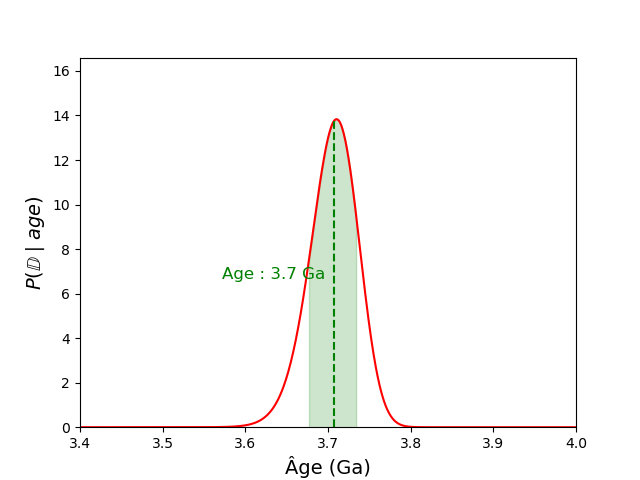

In [19]:
# Ce code permet de calculer la probabilité d'un âge connaissant une population de cratères dans un interval donné
def datationPoisson(diamCrat, gammeDiamFit, aire, coefChrono, coefFoncProd):
    cratGamme = diamCrat[np.where((diamCrat > gammeDiamFit[0]) & (diamCrat < gammeDiamFit[1]))]
    
    dt = 0.001
    # We test different ages from 0 to 5 Gy
    vecteurAgeTest = np.arange(dt, 5, dt)

    FPDiamMin = np.sum(coefFoncProd[1:] * np.log10(gammeDiamFit[0]) ** np.arange(1, len(coefFoncProd)))
    FPDiamMax = np.sum(coefFoncProd[1:] * np.log10(gammeDiamFit[1]) ** np.arange(1, len(coefFoncProd)))

    chrono_vec = (coefChrono[0] * (np.exp(coefChrono[1] * vecteurAgeTest) - 1)
                  + coefChrono[3] * vecteurAgeTest)

    # compute the probability of each age Michael 2016
    probaLog = (-aire * chrono_vec * (10 ** FPDiamMin - 10 ** FPDiamMax) +
                 np.log(chrono_vec) * len(cratGamme))
    
    probaAgeVec = (np.exp(probaLog) / (np.sum(np.exp(probaLog)) * dt))
    
    return vecteurAgeTest, probaAgeVec

vecteurAgePoisson, probaAge = datationPoisson(diamCrat, [diamMin, diamMax], aire, coefChronoLune, coefFoncProdLune)

# Calcul d'une probabilité cumulative
probaCumu = np.cumsum(probaAge) / np.sum(probaAge)
# On peut alors calculer la médiane ainssi que l'enveloppe 1 sigma (68% de chance)
iMed = np.min(np.where(probaCumu > 0.5))
iSigmaInf = np.min(np.where(probaCumu > 0.5 - 0.34))
iSigmaSup = np.min(np.where(probaCumu > 0.5 + 0.34))

meilleurAge = vecteurAgePoisson[iMed]

print(r"L'âge modèle médian est {:.1f} Ga".format(meilleurAge))

figureProba = plt.figure()
sousFigureProba = figureProba.add_subplot(111)
sousFigureProba.set_xlim((3.4, 4))
sousFigureProba.set_ylim(0, np.max(probaAge)*1.2)

sousFigureProba.set_ylabel(r'$P(\mathbb{D} \mid age)$', fontsize=14)
sousFigureProba.set_xlabel(r'Âge (Ga)', fontsize=14)

sousFigureProba.plot(vecteurAgePoisson, probaAge, color = 'red')

sousFigureProba.fill_between(vecteurAgePoisson[iSigmaInf:iSigmaSup], probaAge[iSigmaInf:iSigmaSup], alpha=0.2,color='green')
sousFigureProba.plot([vecteurAgePoisson[iMed], vecteurAgePoisson[iMed]], [0, probaAge[iMed]], color='green', linestyle = "dashed")
textAge = sousFigureProba.annotate(
    r"Age : {:.1f} Ga".format(meilleurAge),
    xy = (meilleurAge, np.max(xiAge)),
    xycoords='data',
    xytext=(-6,0),
    textcoords="offset points",
    horizontalalignment='right',
    fontsize = 12,
    color = 'green'
)